# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Get Weather API Data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4))

{
    "coord": {
        "lon": 53.087,
        "lat": 67.6713
    },
    "weather": [
        {
            "id": 803,
            "main": "Clouds",
            "description": "broken clouds",
            "icon": "04n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 23.23,
        "feels_like": 13.87,
        "temp_min": 23.23,
        "temp_max": 23.23,
        "pressure": 1011,
        "humidity": 86,
        "sea_level": 1011,
        "grnd_level": 1011
    },
    "visibility": 10000,
    "wind": {
        "speed": 8.41,
        "deg": 274,
        "gust": 17.22
    },
    "clouds": {
        "all": 63
    },
    "dt": 1666733200,
    "sys": {
        "country": "RU",
        "sunrise": 1666757411,
        "sunset": 1666786372
    },
    "timezone": 10800,
    "id": 523392,
    "name": "Naryan-Mar",
    "cod": 200
}


In [4]:
# Lists
city_name = []
country = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []

processing_record = 1

# Get a request for all cities with a loop
for city in cities:

# Try/Except
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {processing_record} | {city_record}")
        
        # Add 1 for processing record
        processing_record += 1
        
    except:
        print("----City not found. Skipping...----") 
    continue

Processing Record 1 | San Cristobal
Processing Record 2 | Phan Thiet
Processing Record 3 | Isangel
----City not found. Skipping...----
Processing Record 4 | Norman Wells
Processing Record 5 | Atuona
Processing Record 6 | Kapaa
----City not found. Skipping...----
Processing Record 7 | Ikom
Processing Record 8 | Ushuaia
Processing Record 9 | Rikitea
Processing Record 10 | Tasiilaq
Processing Record 11 | Butaritari
Processing Record 12 | Chapais
Processing Record 13 | Campeche
Processing Record 14 | Huarmey
Processing Record 15 | Nikolskoye
----City not found. Skipping...----
Processing Record 16 | Wagar
Processing Record 17 | Sumbe
Processing Record 18 | Taltal
Processing Record 19 | Kirkwood
Processing Record 20 | Aykhal
Processing Record 21 | Flinders
Processing Record 22 | Vila do Maio
Processing Record 23 | Bredasdorp
Processing Record 24 | Busselton
Processing Record 25 | Zyryanka
Processing Record 26 | Hong Kong
Processing Record 27 | Merauke
Processing Record 28 | Cockburn Town
Pr

Processing Record 224 | Vanino
Processing Record 225 | Dodoma
Processing Record 226 | Tura
Processing Record 227 | Mahébourg
----City not found. Skipping...----
Processing Record 228 | Panabá
Processing Record 229 | Kahului
Processing Record 230 | Goderich
Processing Record 231 | Gao
Processing Record 232 | Barra dos Coqueiros
Processing Record 233 | Forécariah
Processing Record 234 | Asău
Processing Record 235 | Kupang
Processing Record 236 | Esperance
Processing Record 237 | Ostrovnoy
Processing Record 238 | Lucapa
Processing Record 239 | Lavumisa
Processing Record 240 | Belmopan
Processing Record 241 | Matara
Processing Record 242 | Padang
----City not found. Skipping...----
Processing Record 243 | Chokurdakh
Processing Record 244 | Broken Hill
----City not found. Skipping...----
Processing Record 245 | Dubbo
Processing Record 246 | Usakos
Processing Record 247 | Kankan
Processing Record 248 | Lagoa
Processing Record 249 | Goya
Processing Record 250 | Pokrovskoye
----City not found.

Processing Record 452 | Half Moon Bay
Processing Record 453 | Sumenep
Processing Record 454 | Biak
----City not found. Skipping...----
Processing Record 455 | Tautira
Processing Record 456 | Bathsheba
Processing Record 457 | Alta Floresta
Processing Record 458 | Bhisho
Processing Record 459 | La Santisima Trinidad
Processing Record 460 | Larnaca
Processing Record 461 | Cururupu
Processing Record 462 | Honningsvåg
Processing Record 463 | Hakkâri Province
Processing Record 464 | Lakes Entrance
Processing Record 465 | San Ramon
Processing Record 466 | Tshane
Processing Record 467 | Diffa
Processing Record 468 | Zonguldak
Processing Record 469 | Kinkala
Processing Record 470 | Usinsk
Processing Record 471 | Tilichiki
Processing Record 472 | Burnie
Processing Record 473 | Kem'
Processing Record 474 | De-Kastri
Processing Record 475 | La Ronge
Processing Record 476 | Kilifi
Processing Record 477 | Marrakesh
Processing Record 478 | Mukhen
Processing Record 479 | Olhão
Processing Record 480 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create Dictionary 
weather_dict = {"City":city_name,
                "Country":country,
                "Latitude":latitude,
                "Longitude":longitude,
                "Max Temperature":max_temperature,
                "Humidity":humidity,
                "Cloudiness":cloudiness,
                "Wind Speed":wind_speed
}

# Create Dataframe 
weather_df=pd.DataFrame(weather_dict)
weather_df.to_csv(output_data_file,index=False)
weather_df

,City,Country,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,San Cristobal,VE,7.7669,-72.2250,77.18,57,100,3.00
1,Phan Thiet,VN,10.9333,108.1000,75.97,89,100,3.98
2,Isangel,VU,-19.5500,169.2667,76.62,77,100,13.09
3,Norman Wells,CA,65.2820,-126.8329,19.44,93,75,2.30
4,Atuona,PF,-9.8000,-139.0333,77.18,70,3,18.77
...,...,...,...,...,...,...,...,...
567,Te Anau,NZ,-45.4167,167.7167,52.66,80,100,5.39
568,Nueve de Julio,AR,-35.4444,-60.8831,78.53,45,99,12.39
569,Gijang,KR,35.2442,129.2139,46.13,59,67,7.74
570,Gorontalo,ID,0.5412,123.0595,76.01,91,99,2.08


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Look for the highest Humidity to see if any exceed 100%
humidity_stats=weather_df["Humidity"].describe(include="all")
humidity_stats

count    572.000000
mean      72.802448
std       19.874769
min       12.000000
25%       62.000000
50%       77.000000
75%       88.000000
max      100.000000
Name: Humidity, dtype: float64

The max humidity is at 100% so therefore there doesn't seem to be any cities with over 100% humidity in the list.

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

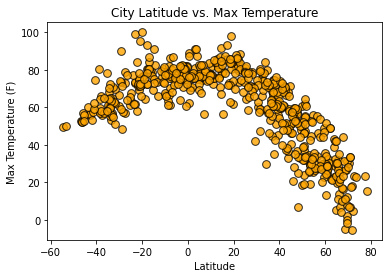

In [8]:
# Scatter Plot 
plt.scatter(weather_df['Latitude'], weather_df['Max Temperature'], edgecolor="black", linewidths=1, marker="o",
           alpha=0.8,s=[60],facecolors="orange", label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature")
plt.savefig('Images/City Latitude vs.Temperature.png')

According to this scatter plot, there seems to be a negative correlation between city latitude and max temperature. Therefore, the higher the latitude of the city, the lower the max temperature of that city is.

## Latitude vs. Humidity Plot

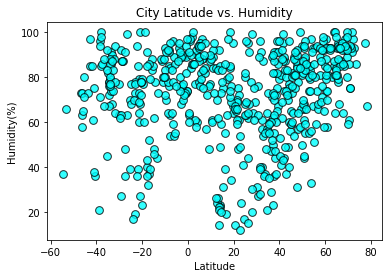

In [9]:
# Scatter Plot 
plt.scatter(weather_df['Latitude'], weather_df['Humidity'], edgecolor="black", linewidths=1, marker="o",
           alpha=0.8,s=[60],facecolors="cyan", label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City Latitude vs. Humidity")
plt.savefig('Images/City Latitude vs. Humidity.png')

With this plot, there does not seem to be a correlation between humidity and latitude.

## Latitude vs. Cloudiness Plot

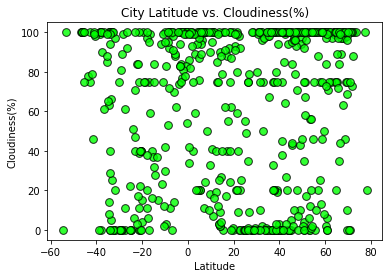

In [10]:
# Scatter Plot 
plt.scatter(weather_df['Latitude'], weather_df['Cloudiness'], edgecolor="black", linewidths=1, marker="o",
           alpha=0.8,s=[60],facecolors="lime", label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Latitude vs. Cloudiness(%)")
plt.savefig('Images/City Latitude vs. Cloudiness.png')

With this plot, there does not seem to be a correlation between cloudiness and latitude.

## Latitude vs. Wind Speed Plot

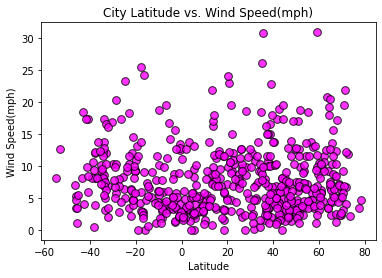

In [11]:
# Scatter Plot 
plt.scatter(weather_df['Latitude'], weather_df['Wind Speed'], edgecolor="black", linewidths=1, marker="o",
           alpha=0.8,s=[60],facecolors="magenta", label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title("City Latitude vs. Wind Speed(mph)")
plt.savefig('Images/City Latitude vs. Wind Speed.png')

With this plot, there does not seem to be a correlation between wind speed and latitude.

## Linear Regression

In [12]:
# Create dataframes for north and south hemispheres 
weather_df_north = weather_df[weather_df['Latitude'] >= 0]
weather_df_south = weather_df[weather_df['Latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared= 0.74


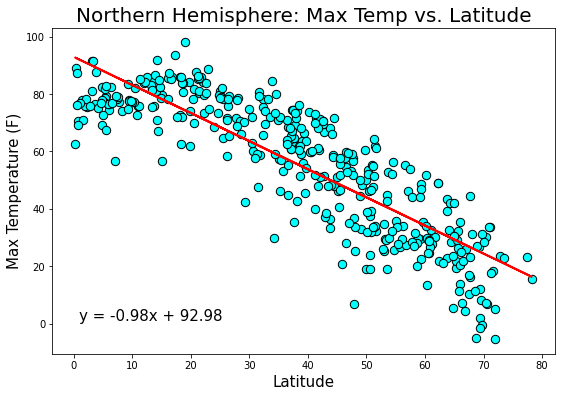

In [13]:
# Scatter Plot data
plt.figure(figsize=(9,6))
x_values = weather_df_north['Latitude']
y_values = weather_df_north['Max Temperature']

# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Scatter Plot
plt.scatter(x_values,y_values, marker='o', color='cyan', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'red', linewidth=2)
plt.title('Northern Hemisphere: Max Temp vs. Latitude', fontsize=20)
plt.ylabel('Max Temperature (F)', fontsize=15, color='black')
plt.xlabel('Latitude', fontsize=15, color='black')
plt.annotate(line_eq,(1, 1), fontsize=15, color='black')

# Save the figure:
plt.savefig('Images/City Latitude vs. Temperature North.png')

print(f'The r-squared= {round(rvalue**2,2)}')

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared= 0.42


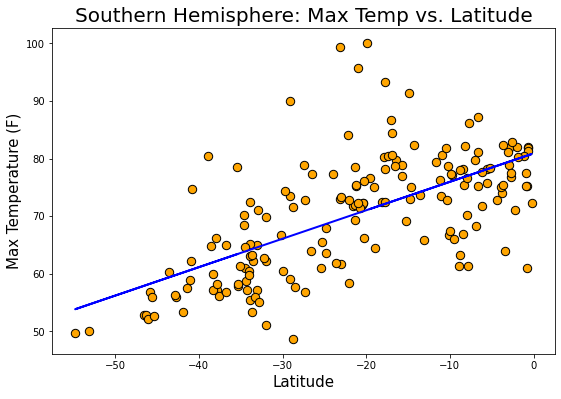

In [14]:
# Scatter Plot data
plt.figure(figsize=(9,6))
x_values = weather_df_south['Latitude']
y_values = weather_df_south['Max Temperature']

# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Scatter Plot
plt.scatter(x_values,y_values, marker='o', color='orange', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'blue', linewidth=2)
plt.title('Southern Hemisphere: Max Temp vs. Latitude', fontsize=20)
plt.ylabel('Max Temperature (F)', fontsize=15, color='black')
plt.xlabel('Latitude', fontsize=15, color='black')
plt.annotate(line_eq,(-20, 40), fontsize=15, color='black')

# Save the figure:
plt.savefig('Images/City Latitude vs. Temperature South.png')

print(f'The r-squared= {round(rvalue**2,2)}')

plt.show()

Based on the North scatter plot, there is a strong negative correlation between latitude and temperature. Therefore, cities that are further away from the equator will have lower temperature. Meanwhile, in the South scatter plot there is a positive correlation between temperature and latitude. Cities that are closer to the equator will have a higher temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared= 0.05


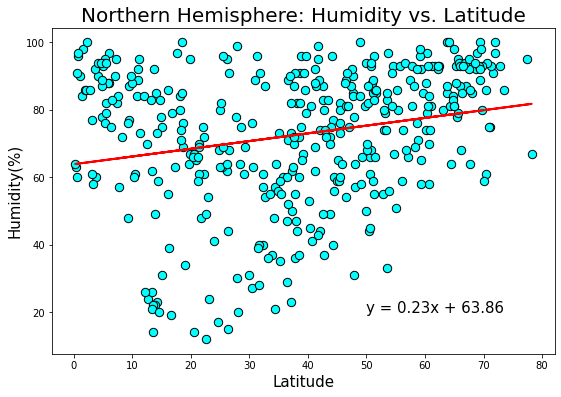

In [15]:
# Scatter Plot data
plt.figure(figsize=(9,6))
x_values = weather_df_north['Latitude']
y_values = weather_df_north['Humidity']

# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Scatter Plot
plt.scatter(x_values,y_values, marker='o', color='cyan', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'red', linewidth=2)
plt.title('Northern Hemisphere: Humidity vs. Latitude', fontsize=20)
plt.ylabel('Humidity(%)', fontsize=15, color='black')
plt.xlabel('Latitude', fontsize=15, color='black')
plt.annotate(line_eq,(50,20), fontsize=15, color='black')

# Save the figure:
plt.savefig('Images/City Latitude vs. Humidity North.png')

print(f'The r-squared= {round(rvalue**2,2)}')

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared= 0.02


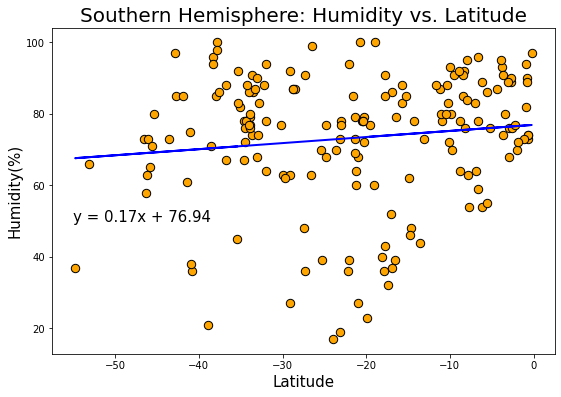

In [16]:
# Scatter Plot data
plt.figure(figsize=(9,6))
x_values = weather_df_south['Latitude']
y_values = weather_df_south['Humidity']

# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Scatter Plot
plt.scatter(x_values,y_values, marker='o', color='orange', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'blue', linewidth=2)
plt.title('Southern Hemisphere: Humidity vs. Latitude', fontsize=20)
plt.ylabel('Humidity(%)', fontsize=15, color='black')
plt.xlabel('Latitude', fontsize=15, color='black')
plt.annotate(line_eq,(-55,50), fontsize=15, color='black')

# Save the figure:
plt.savefig('Images/City Latitude vs. Humidity South.png')

print(f'The r-squared= {round(rvalue**2,2)}')

plt.show()

There seems to be almost no correlation between humidity and latitude for both Northern and Southern hemisphere cities. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared= 0.01


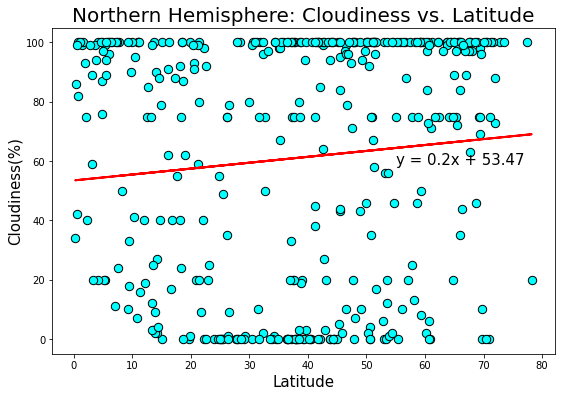

In [17]:
# Scatter Plot data
plt.figure(figsize=(9,6))
x_values = weather_df_north['Latitude']
y_values = weather_df_north['Cloudiness']

# Linear Regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Scatter Plot
plt.scatter(x_values,y_values, marker='o', color='cyan', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'red', linewidth=2)
plt.title('Northern Hemisphere: Cloudiness vs. Latitude', fontsize=20)
plt.ylabel('Cloudiness(%)', fontsize=15, color='black')
plt.xlabel('Latitude', fontsize=15, color='black')
plt.annotate(line_eq,(55,59), fontsize=15, color='black')

# Save the figure:
plt.savefig('Images/City Latitude vs. Cloudiness North.png')

print(f'The r-squared= {round(rvalue**2,2)}')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared= 0.01


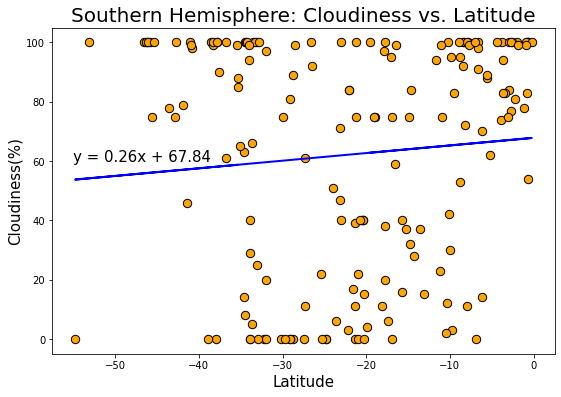

In [18]:
# Scatter Plot data
plt.figure(figsize=(9,6))
x_values = weather_df_south['Latitude']
y_values = weather_df_south['Cloudiness']

# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# # Scatter Plot
plt.scatter(x_values,y_values, marker='o', color='orange', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'blue', linewidth=2)
plt.title('Southern Hemisphere: Cloudiness vs. Latitude', fontsize=20)
plt.ylabel('Cloudiness(%)', fontsize=15, color='black')
plt.xlabel('Latitude', fontsize=15, color='black')
plt.annotate(line_eq,(-55,60), fontsize=15, color='black')

# Save the figure:
plt.savefig('Images/City Latitude vs. Cloudiness South.png')

print(f'The r-squared= {round(rvalue**2,2)}')

plt.show()

Between the two plots, there doesnt seem to be a correlation between cloudiness and latitude for cities in Northern and Southern hemispheres.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared= 0.01


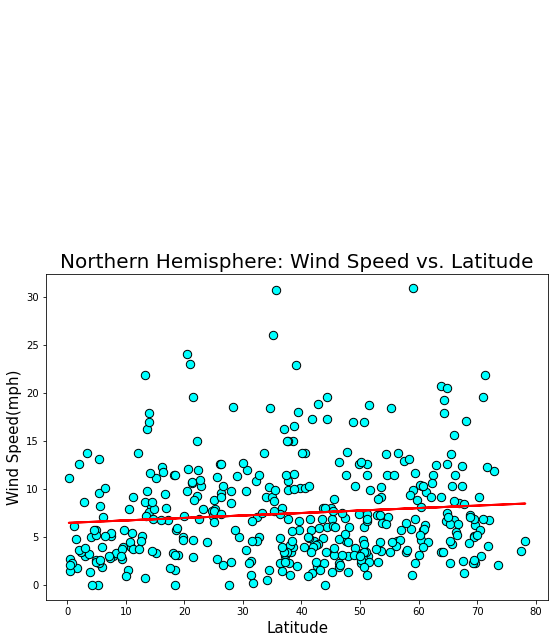

In [19]:
# Scatter Plot data
plt.figure(figsize=(9,6))
x_values = weather_df_north['Latitude']
y_values = weather_df_north['Wind Speed']

# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# # Scatter Plot
plt.scatter(x_values,y_values, marker='o', color='cyan', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'red', linewidth=2)
plt.title('Northern Hemisphere: Wind Speed vs. Latitude', fontsize=20)
plt.ylabel('Wind Speed(mph)', fontsize=15, color='black')
plt.xlabel('Latitude', fontsize=15, color='black')
plt.annotate(line_eq,(55,59), fontsize=15, color='black')

# Save the figure:
plt.savefig('Images/City Latitude vs. Wind Speed North.png')

print(f'The r-squared= {round(rvalue**2,2)}')

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared= 0.04


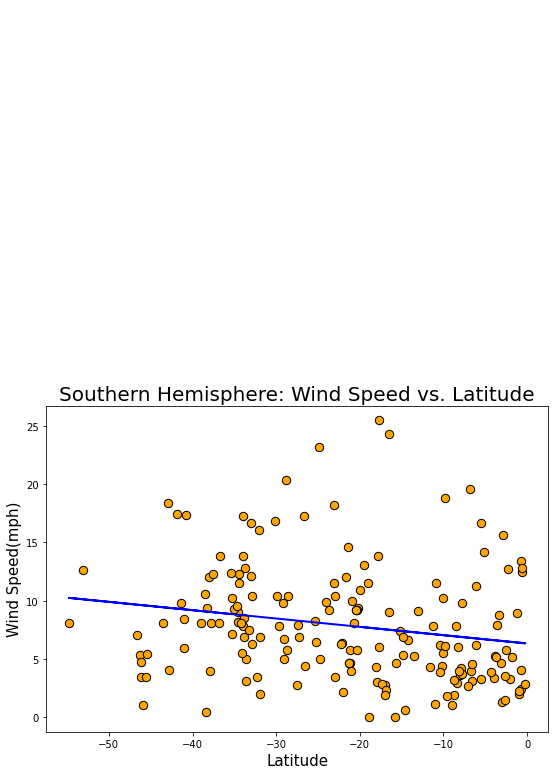

In [20]:
# Scatter Plot data
plt.figure(figsize=(9,6))
x_values = weather_df_south['Latitude']
y_values = weather_df_south['Wind Speed']

# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Scatter Plot
plt.scatter(x_values,y_values, marker='o', color='orange', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'blue', linewidth=2)
plt.title('Southern Hemisphere: Wind Speed vs. Latitude', fontsize=20)
plt.ylabel('Wind Speed(mph)', fontsize=15, color='black')
plt.xlabel('Latitude', fontsize=15, color='black')
plt.annotate(line_eq,(-55,60), fontsize=15, color='black')

# Save the figure:
plt.savefig('Images/City Latitude vs. Wind Speed South.png')

print(f'The r-squared= {round(rvalue**2,2)}')

plt.show()

Between the two plots, there doesnt seem to be a correlation between wind speed and latitude for cities in Northern and Southern hemispheres.